## Random Complexes
A few examples of some random complex generators I have and how different types of networks can be created using them

This file has examples of:
1. An Erodos Renyi Complex (ER graph with weighted edges)
2. A random geometric graph
3. A random geometric graph with a stacked Gaussian PDF
4. Any other graph with randomly assigned edge weights

#### Preliminaries

In [18]:
# load some packages
import Gavin.utils.random_complexes as rc
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

#### 1. ER Model
Create an ER simplicial complex.

Uses the `erdos_renyi_complex` function in the `random_complexes` file to create it. The function could also take a user-defined edge list (ex: the edges in the real network) and fill edge weights in with that instead. We also get a network, but it could alternatively return an adjacency matrix

{'weight': 0.582490856160733}

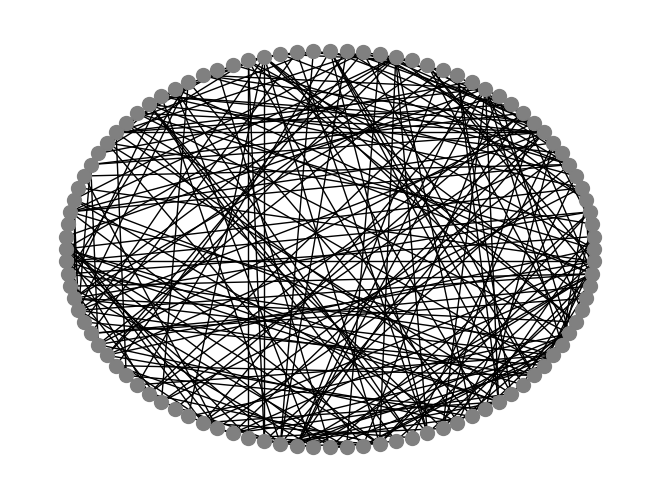

In [17]:
# config
N = 100 # number of nodes
d = 0.05 # density

# create the graph
G = rc.erdos_renyi_complex(
        N,
        density=d,
        return_graph=True,
        seed=10
    )

# use network
nx.draw_circular(G, node_color='gray', node_size=100) # see network
G.edges[list(G.edges)[0]] # see weight

#### 2. Geometric Graph
We create a random geometric graph with distances as the edge weight

The points are randomly generated in $[0, 1)^2$ based on the numpy random function

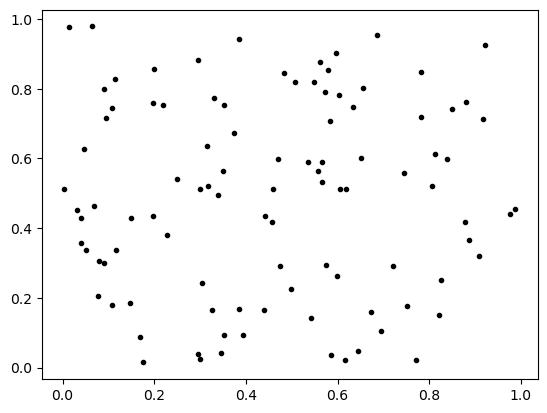

In [27]:
# config
np.random.seed(10)
N = 100
dim = 2
density = 0.05

# generate points
pts = np.random.random((N, dim))

# see where the points are
plt.plot(pts[:, 0], pts[:, 1], 'k.')

Use the `complex_from_points` function to turn this point set into a distance weighted graph. Because the density parameter is set to 0.05, only the shortest 5% of the edges are kept in the network

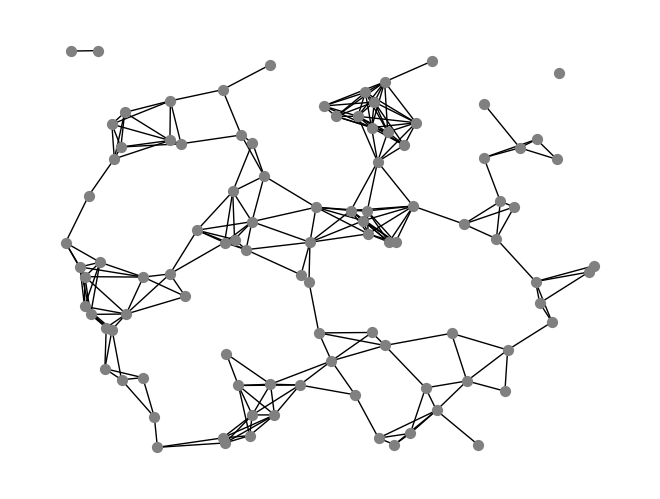

In [31]:
# create the graph
G = rc.complex_from_points(
        pts,
        density=density,
        normalize=True,
        return_graph=True
    )

# plot it
nx.draw(G, pts, node_color='gray', node_size=50)

#### 4. PDF-Weighted Random Geometric Graph
Random geometric graphs are cool, but if we want certain behavior (ex: clustering), we can force them to appear by using points sampled according to a PDF rather than randomly.

Here, we sample based on stacked (added) Gaussians to force the graph to have three clusters

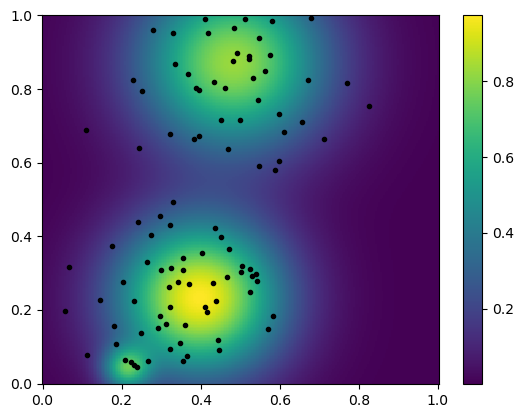

In [49]:
# config
np.random.seed(1000)
N = 100
dim = 2
num_gausians = 3
min_weight=0.5
spread_multiplier = 5 # divde the standard deviation by this
res = 250 # plot resolution

# create the gaussians
As = min_weight+(1-min_weight)*np.random.random(num_gausians) # weight
x0s = np.random.random((num_gausians, dim)) # centers of the gaussians
sigmas = np.random.random(num_gausians) / spread_multiplier # spread
gaussians = rc.gen_stacked_gaussians(As, x0s, sigmas) # gaussian function

# gaussian values (for plot and pdf_max)
x = np.meshgrid(*[np.linspace(0, 1, res) for _ in range(2)]) # grid to calculate plot on
gaussian_vals = gaussians(np.stack(x, axis=-1))

# sample points
pts = rc.sample_from_pdf(
    N,
    dim=dim,
    pdf=gaussians,
    pdf_max=1,
    seed=100
)

# plot it
cm = plt.pcolormesh(*x, gaussian_vals) # gaussians
plt.colorbar(cm)
plt.plot(pts[:, 0], pts[:, 1], 'k.') # points

This code is the same as for a standard geometric random graph

/opt/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


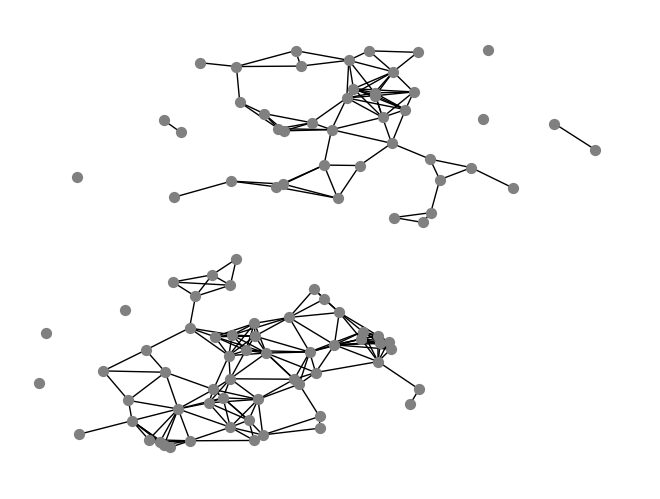

In [50]:
# create the graph
G = rc.complex_from_points(
        pts,
        density=density,
        normalize=True,
        return_graph=True
    )

# plot it
nx.draw(G, pts, node_color='gray', node_size=50)

#### 4. Some Other Random Graph
These functions aren't all encompassing of every possible random graph. To use those, a trivial idea is to generate the graph randomly using some other process and add edge weights to the graph.

The `random_complexes` file has code to assign edge weights, either randomly, by a user defined (possibly random) function, or a list. Here, we use the default, random behavior.

{'weight': 0.3764785895599899}

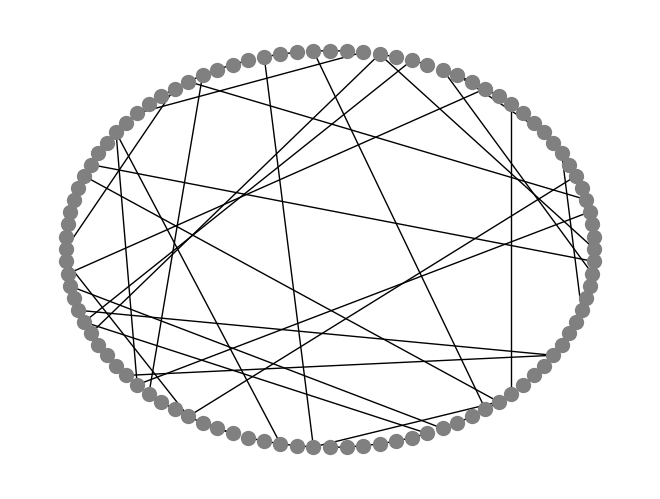

In [53]:
# config
N = 100
k = 2 # watts strogatz config
p = 0.25

# make the graph
G = nx.watts_strogatz_graph(N, k, p, seed=10)

# add weights
G = rc.assign_edge_weights(G)

# use network
nx.draw_circular(G, node_color='gray', node_size=100) # see network
G.edges[list(G.edges)[0]] # see weight